In [0]:
ls

sample_data/


In [0]:
ls

retinopathy-dataset.zip  sample_data/


In [0]:
import os
statinfo = os.stat('retinopathy-dataset.zip')
statinfo

os.stat_result(st_mode=33188, st_ino=1850914, st_dev=45, st_nlink=1, st_uid=0, st_gid=0, st_size=4194304, st_atime=1552310439, st_mtime=1552310473, st_ctime=1552310473)

In [0]:
import shutil
shutil.rmtree('retinopathy-dataset/')

In [0]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (69.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 131322 files and directories currently instal

In [0]:
import os 
  
# This is to get the directory that the program  
# is currently running in. 
# dir_path = os.path.dirname(os.path.realpath(__file__))
dir_path = os.path.dirname(os.path.realpath('__file__'))

  
for root, dirs, files in os.walk(dir_path): 
    for file in files:  
  
        # change the extension from '.mp3' to  
        # the one of your choice. 
        if file.endswith('dataset.zip'): 
            print(root+'/'+str(file)) 


/content/retinopathy-dataset.zip


In [0]:
ls

sample_data/


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/Colab\ Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [0]:
ls

dataset.py                 nevinbaiju-diab.ipynb
DiabeticRetinopathy.ipynb  retinopathy-dataset.zip


In [0]:
!unzip retinopathy-dataset.zip

Archive:  retinopathy-dataset.zip
   creating: retinopathy-dataset-master/
   creating: retinopathy-dataset-master/nosymptoms/
  inflating: retinopathy-dataset-master/nosymptoms/10265_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10643_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10643_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10845_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10942_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10945_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10947_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10947_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10962_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10962_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/1096_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/1096_right.jpeg  
  inflating: retinopathy-dataset-master/no

In [0]:
ls

dataset.py                 nevinbaiju-diab.ipynb        retinopathy-dataset.zip
DiabeticRetinopathy.ipynb  retinopathy-dataset-master/


In [0]:
cd ../../..

/content


In [0]:
import numpy as np
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.models import Model
from keras.layers import GlobalAveragePooling2D,MaxPooling2D
from keras.layers import Dense,Flatten,SpatialDropout2D
from keras.layers.merge import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
%matplotlib inline

In [0]:
image_size = (64, 64)

In [0]:
def plot_model_history(history):
    """
    Function to plot training and validation data of model
    
    Parameters
    ----------
    history: dictionary
             history of training and validation of model
    Returns
    -------
    None
    
    """
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
def buildNet(num_classes):
    """
    Function to build 4 layer NN with 2 Conv layers, 1 MaxPool layer,
    1 GlobalMaxPool layer and 2 Dense layers
    
    Parameters
    ----------
    num_classes: int
                 Number of classes in training data
    Returns
    -------
    Neural Network created
    """
    model1=Sequential()
    model1.add(Convolution2D(32, (3,3),input_shape=(image_size[0], image_size[1], 3),activation='relu'))
    model1.add(MaxPooling2D(pool_size=(2,2)))
    model1.add(Convolution2D(64,(3,3),activation='relu'))
    model1.add(GlobalAveragePooling2D())

    model1.add(Dense(128, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model1.summary())
    return model1

In [0]:
def trainNet(training_set, validation_set):
    """
    Function to train Neural Network Created, save it as hd5 and plot the various parameters.
    
    Arguments
    ---------
    training_set:   ImageDataGenerator object
                    Training set with labels.
    validation_set: ImageDataGenerator object
                    Validation set with labels.
    
    Returns
    -------
    history: dictionary
             History of training and validation of model.
    """
    num_classes = 1#y_train.shape[1]
    model = buildNet(num_classes)
    history = History()
    callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),history]
    
    history = model.fit_generator(training_set,
                                steps_per_epoch = 8000/32,
                                epochs = 30,
                                validation_data = validation_set,
                                validation_steps = 64,
                                workers = 8)
    model.save('model.hd5')
    plot_model_history(history)

    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=100,callbacks=callbacks,verbose=1)
    return history

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('./gdrive/My Drive/Colab Notebooks/retin_data/cimages_train',
                                                 target_size = image_size,
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory('./gdrive/My Drive/Colab Notebooks/retin_data/cimages_test',
                                                  target_size = image_size,
                                                  batch_size = 32,
                                                  class_mode = 'binary', shuffle=False)

Found 1485 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 27,841
Trainable params: 27,841
Non-trainable params: 0


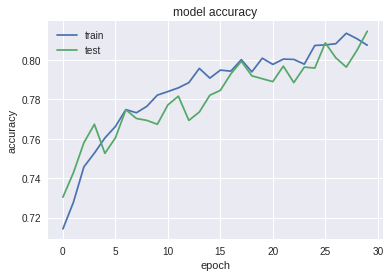

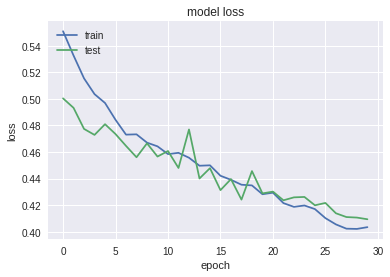

In [11]:
history = trainNet(training_set=training_set, validation_set=validation_set)


In [0]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator


In [0]:
import cv2
import numpy as np

In [0]:
mod=load_model('model.hd5')

In [0]:
mod.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
test_gen = ImageDataGenerator(rescale = 1./255)

In [22]:
import os
# PROJECT_PATH = os.path.abspath(os.path.dirname(__file__))
# CAPTHA_ROOT = os.path.join(PROJECT_PATH,'')
    
test_data = test_gen.flow_from_directory('./gdrive/My Drive/Colab Notebooks/files/',
                                              target_size = (64, 64),
                                              batch_size = 32,
                                              class_mode = 'binary', shuffle=False)

Found 2 images belonging to 1 classes.


In [0]:
filenames = test_data.filenames

In [24]:
nb_samples = len(filenames)
print(nb_samples)

2


In [25]:
ls

gdrive/  model.hd5  sample_data/


In [0]:
predict = mod.predict_generator(test_data,steps = nb_samples/32)

In [0]:
loss, acc = mod.evaluate_generator(test_data, steps=nb_samples/32, verbose=0)

In [32]:
print("LOSS: ", loss)
print("ACC: ", acc)

LOSS:  1.2418221235275269
ACC:  0.0


In [29]:
y_pred = predict[0][0] > 0.4
print(y_pred)

True


In [30]:
percent_chance = round(predict[0][0]*100, 2)
print(percent_chance)

66.57
